In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn 

Pre-processing and creation of the datapoints

In [2]:
lowC = pd.read_csv("/notebooks/Progetto/data/Clean/ShareElectricityLowCarbon.csv", sep=";")
accessElec = pd.read_csv("/notebooks/Progetto/data/Clean/elecAccess.csv", sep=";")
popGrowth = pd.read_csv("/notebooks/Progetto/data/Clean/popGrowth.csv", sep=";")
energyUse = pd.read_csv("/notebooks/Progetto/data/Clean/energyUse.csv", sep=";")
GDP = pd.read_csv("/notebooks/Progetto/data/Clean/GDP.csv", sep=";")
population = pd.read_csv("/notebooks/Progetto/data/Clean/population.csv", sep=";")

totEmissions = pd.read_csv("/notebooks/Progetto/data/Clean/totEmissions.csv", sep=";")

lowC.at[0,"Year"] = 2000
lowC.at[1,"1990"] = 0

y = np.array([])

X = np.array([[0,0,0,0,0,0]])

names = np.array([])
for year in range(1990,2017):
    for code in lowC["Code"]:        
        X_1 = lowC.loc[lowC['Code'] == code][str(year)].values
        X_2 = accessElec.loc[accessElec['Country Code'] == code][str(year)].values
        X_3 = popGrowth.loc[popGrowth['Country Code'] == code][str(year)].values
        X_4 = energyUse.loc[energyUse['Code'] == code][str(year)].values
        X_5 = GDP.loc[GDP['Country Code'] == code][str(year)].values
        X_6 = population.loc[population['Country Code'] == code][str(year)].values
        
        if(len(X_1) == 1 and len(X_2) == 1 and len(X_3) == 1 and len(X_4) == 1 and len(X_5) == 1 and len(X_6) == 1 and len(totEmissions.loc[totEmissions['Country Code'] == code][str(year)].values)==1 ):
            X = np.vstack( (X, [ X_1[0],X_2[0],X_3[0],X_4[0],X_5[0],X_6[0] ]) )
            y = np.append(y, totEmissions.loc[totEmissions['Country Code'] == code][str(year)] / X_6 * 1000)
            names = np.append(names, code + str(year))
            
X_train = pd.DataFrame(X[1:])
X_train.insert(6, "labels", names, True)
X_train.insert(7, "y", y, True)
X_train.head(5)

,0,1,2,3,4,5,labels,y
0,NaN,NaN,0.202434,2968.3160,NaN,10694796.0,AFG1990,1.087519
1,0.000000,NaN,3.345144,1972.4146,3283.170843,11828638.0,AGO1990,3.650937
2,86.363640,100.0000,1.799086,10214.5980,2549.746801,3286542.0,ALB1990,3.402079
3,0.000000,100.0000,5.869033,181538.7700,83843.224680,1900151.0,ARE1990,41.366101
4,49.264286,92.1548,1.456403,15718.7030,7183.583826,32637657.0,ARG1990,7.635008


In [3]:
y = np.array([])
X = np.array([[0,0,0,0,0,0]])
names = np.array([])

for year in range(2017,2021):
    for code in lowC["Code"]:        
        X_1 = lowC.loc[lowC['Code'] == code][str(year)].values
        X_2 = accessElec.loc[accessElec['Country Code'] == code][str(year)].values
        X_3 = popGrowth.loc[popGrowth['Country Code'] == code][str(year)].values
        X_4 = energyUse.loc[energyUse['Code'] == code][str(year)].values
        X_5 = GDP.loc[GDP['Country Code'] == code][str(year)].values
        X_6 = population.loc[population['Country Code'] == code][str(year)].values
        
        if(len(X_1) == 1 and len(X_2) == 1 and len(X_3) == 1 and len(X_4) == 1 and len(X_5) == 1 and len(X_6) == 1 and len(totEmissions.loc[totEmissions['Country Code'] == code][str(year)].values)==1 ):
            X = np.vstack( (X, [ X_1[0],X_2[0],X_3[0],X_4[0],X_5[0],X_6[0] ]) )
            y = np.append(y, totEmissions.loc[totEmissions['Country Code'] == code][str(year)] / X_6 * 1000)
            names = np.append(names, code + str(year))
            
X_test = pd.DataFrame(X[1:])
X_test.insert(6, "labels", names, True)
X_test.insert(7, "y", y, True)
X_test.head(5)

,0,1,2,3,4,5,labels,y
0,85.826775,97.700000,2.866492,829.31195,2096.093111,35643418.0,AFG2017,0.890783
1,72.003746,42.906242,3.550987,3370.89620,7216.061373,30208628.0,AGO2017,2.715241
2,100.000000,99.890000,-0.091972,12802.36000,12770.991860,2873457.0,ALB2017,3.453775
3,0.592698,100.000000,0.819744,135601.27000,71182.370720,9068296.0,ARE2017,27.705142
4,28.267298,100.000000,1.037134,22503.81800,23597.117750,44044811.0,ARG2017,8.614415


Final cleanup of NaN

In [4]:
X_train = X_train.dropna()
X_test = X_test.dropna()

X_train.columns=["lowC","accessElec","popGrowth","energyUse","GDP", "population", "labels", "y"]
X_test.columns=["lowC","accessElec","popGrowth","energyUse","GDP", "population", "labels", "y"]

X_train.reset_index()
X_test.reset_index()

y_train = pd.DataFrame(X_train["y"])
labels_train = pd.DataFrame(X_train["labels"])
X_train = X_train[["lowC","accessElec","popGrowth","energyUse","GDP"]]

y_test = X_test["y"]
labels_test = X_test["labels"]
X_test = X_test[["lowC","accessElec","popGrowth","energyUse","GDP"]]

In [5]:
print(y_train.head(5))

           y
2   3.402079
3  41.366101
4   7.635008
7  28.744657
8   9.980695


Some basic information about the dataset

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3371 entries, 2 to 4967
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lowC        3371 non-null   float64
 1   accessElec  3371 non-null   float64
 2   popGrowth   3371 non-null   float64
 3   energyUse   3371 non-null   float64
 4   GDP         3371 non-null   float64
dtypes: float64(5)
memory usage: 158.0 KB


Some plot to test the data

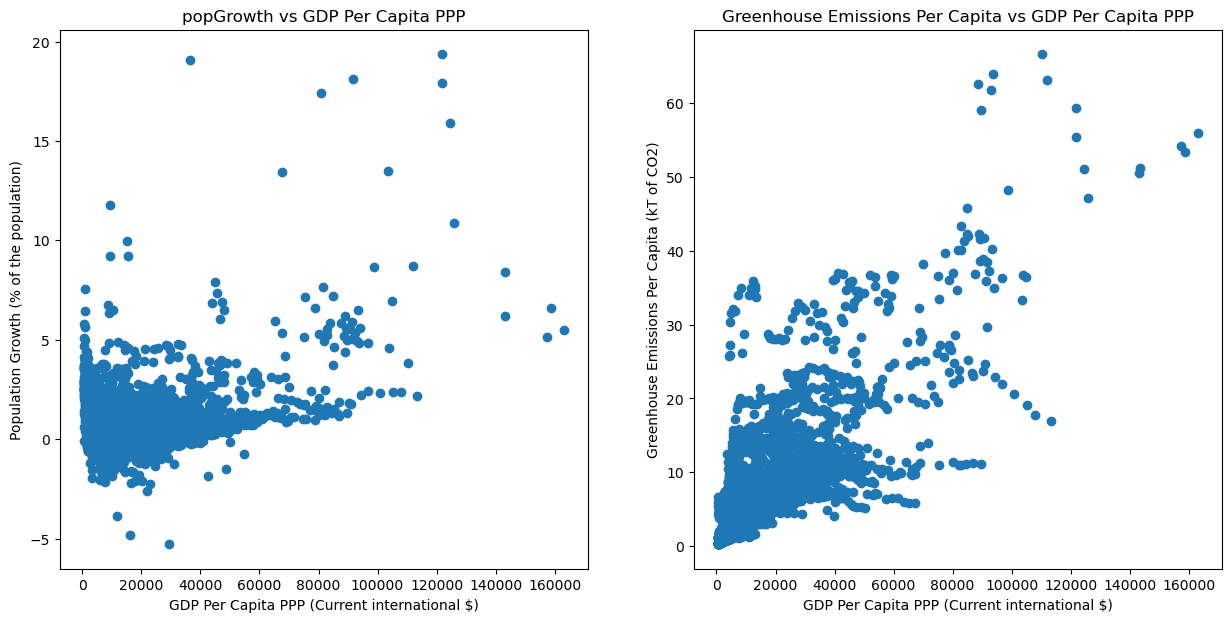

In [11]:
# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].scatter(X_train['GDP'], X_train['popGrowth'])
axes[0].set_xlabel("GDP Per Capita PPP (Current international $)")
axes[0].set_ylabel("Population Growth (% of the population)")
axes[0].set_title("popGrowth vs GDP Per Capita PPP")

axes[1].scatter(X_train['GDP'], y_train) #use Emissions Per Capita to tackle the impact of the population size in the plot
axes[1].set_title('Greenhouse Emissions Per Capita vs GDP Per Capita PPP')
axes[1].set_xlabel("GDP Per Capita PPP (Current international $)")
axes[1].set_ylabel('Greenhouse Emissions Per Capita (kT of CO2)')
plt.show()

Correlation matrix

            accessElec  popGrowth  energyUse       GDP
accessElec    1.000000  -0.405964   0.467397  0.464918
popGrowth    -0.405964   1.000000   0.110968  0.157050
energyUse     0.467397   0.110968   1.000000  0.849229
GDP           0.464918   0.157050   0.849229  1.000000


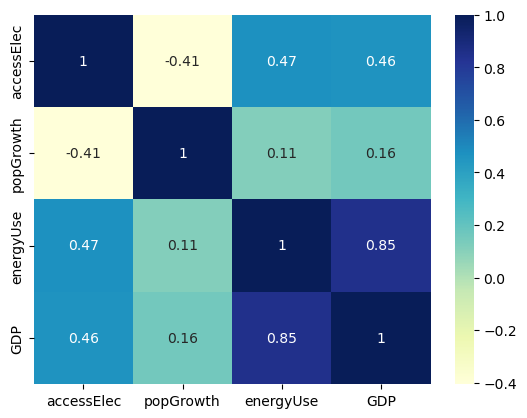

In [8]:
print(X_train.iloc[:, 1:6].corr())
dataplot = sn.heatmap(X_train.iloc[:, 1:6].corr(), cmap="YlGnBu", annot=True)

# Fitting a linear regression model onto the X (lowC, accessElec, popGrowth, energyUse, GDP)

In [22]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split

In [10]:
lin = LinearRegression()

v = lin.fit(X_train, y_train)
print(v.coef_)
print(v.intercept_)

[[-3.96216531e-02  1.95970494e-02  3.28584421e-01  1.45163223e-04
   5.92413854e-05]]
[2.08260383]


Testing on training data

16.112496074096796


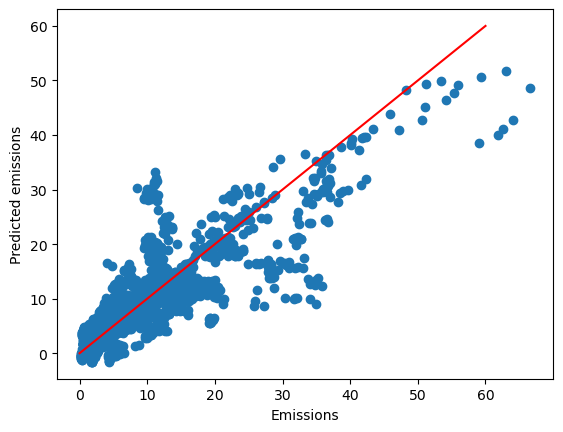

In [12]:
y_pred = lin.predict(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel("Emissions")
plt.ylabel("Predicted emissions")
plt.plot(np.linspace(0,60), np.linspace(0,60), color="r")

mse = mean_squared_error(y_train, y_pred)
print(mse)

In [56]:
tr_error_val = []
tr_error_train = []
v = []
y_poly_pred = []
mean_square_error_val = []
mean_square_error_train = []

k = 5
kf = KFold(n_splits=k)

for i in range(0,5):
    
    tr_error_fold_val = []
    mean_square_error_fold_val = []
    tr_error_fold_train = []
    mean_square_error_fold_train = []
    
    poly = PolynomialFeatures(i+1)
    lin = LinearRegression()
    
    print(kf.split(X_train, y_train))
    
    for train_index, val_index in kf.split(X_train):
        
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Transform the data using polynomial features
        X_poly_train = poly.fit_transform(X_train_fold)
        X_poly_val = poly.transform(X_val_fold)
        
        # Fit the linear regression model on the training data
        lin.fit(X_poly_train, y_train_fold)
        
        X_poly_test = poly.transform(X_test)
        y_test_pred = lin.predict(X_poly_test)
        
        # Predict on the validation data
        y_poly_pred_val = lin.predict(X_poly_val)
        y_poly_pred_train = lin.predict(X_poly_train)
        
        # Calculate R-squared score for the fold
        fold_r2_score_val = r2_score(y_val_fold, y_poly_pred_val)
        fold_mean_square_score_val = mean_squared_error(y_val_fold, y_poly_pred_val)
        
        fold_r2_score_train = r2_score(y_train_fold, y_poly_pred_train)
        fold_mean_square_score_train = mean_squared_error(y_train_fold, y_poly_pred_train)
        
        
        tr_error_fold_val.append(fold_r2_score_val)
        mean_square_error_fold_val.append(fold_mean_square_score_val)
        
        tr_error_fold_train.append(fold_r2_score_train)
        mean_square_error_fold_train.append(fold_mean_square_score_train)
        
    tr_error_val.append(np.mean(tr_error_fold_val))
    mean_square_error_val.append(np.mean(mean_square_error_fold_val))
    
    tr_error_train.append(np.mean(tr_error_fold_train))
    mean_square_error_train.append(np.mean(mean_square_error_fold_train))
    
    
tr_error_df = pd.DataFrame({'R-squared_val': tr_error_val, 'R-squared_train': tr_error_train})
mean_square_error_df = pd.DataFrame({'MSE_val': mean_square_error_val, 'MSE_train': mean_square_error_train})
    
print(pd.DataFrame(tr_error_df))
print(pd.DataFrame(mean_square_error_df))

<generator object _BaseKFold.split at 0x7fe003d7ff40>
<generator object _BaseKFold.split at 0x7fe003d7ff40>
<generator object _BaseKFold.split at 0x7fe003d7ff40>
<generator object _BaseKFold.split at 0x7fe00c8bfed0>
<generator object _BaseKFold.split at 0x7fe003d7ff40>
   R-squared_val  R-squared_train
0       0.728004         0.748308
1       0.776357         0.807177
2       0.601437         0.840429
3       0.684045         0.859379
4      -0.936523         0.845612
      MSE_val  MSE_train
0   16.714726  16.049808
1   13.920726  12.303570
2   25.516501  10.179707
3   19.859919   8.968254
4  107.370373   9.858971


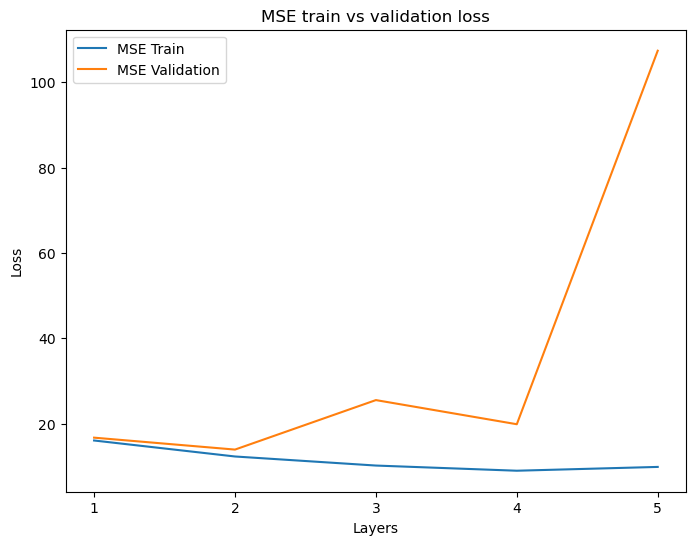

In [50]:
plt.figure(figsize=(8,6))

plt.plot([1,2,3,4,5], mean_square_error_train, label='MSE Train')
plt.plot([1,2,3,4,5], mean_square_error_val, label='MSE Validation')
plt.xticks([1,2,3,4,5])
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title("MSE train vs validation loss")
plt.show()

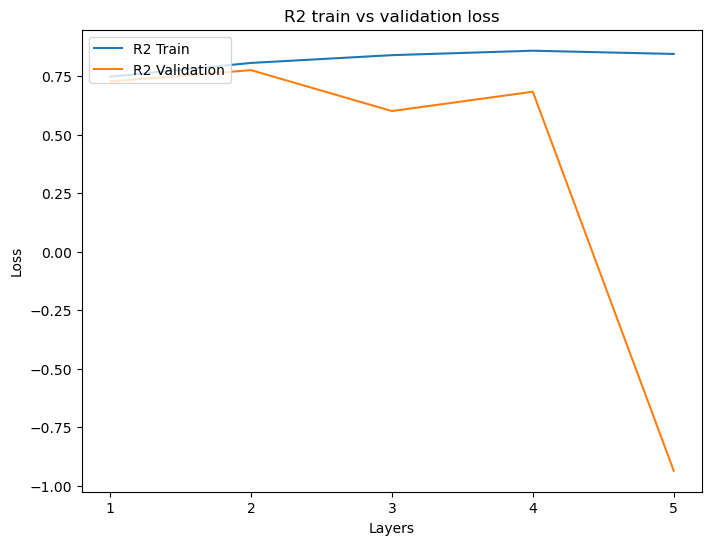

In [52]:
plt.figure(figsize=(8,6))

plt.plot([1,2,3,4,5], tr_error_train, label='R2 Train')
plt.plot([1,2,3,4,5], tr_error_val, label='R2 Validation')
plt.xticks([1,2,3,4,5])
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title("R2 train vs validation loss")
plt.show()

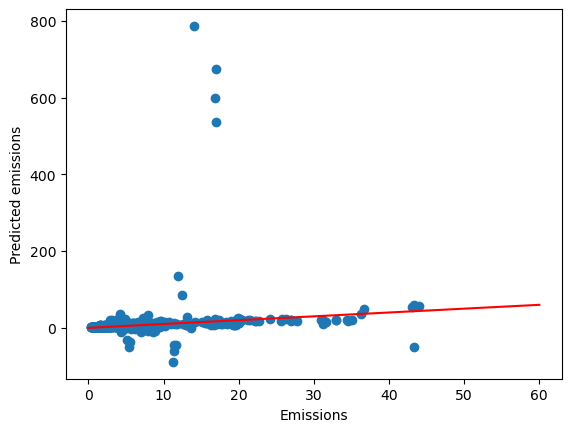

In [58]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Emissions")
plt.ylabel("Predicted emissions")
plt.plot(np.linspace(0,60), np.linspace(0,60), color="r")
plt.show()

# Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/tmp/ipykernel_22444/368208162.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  accuracy_scoreout = rf.fit(X_train, y_train)


Mean Squared Error: 10.040126341870115
R-squared: 0.8429618663513027


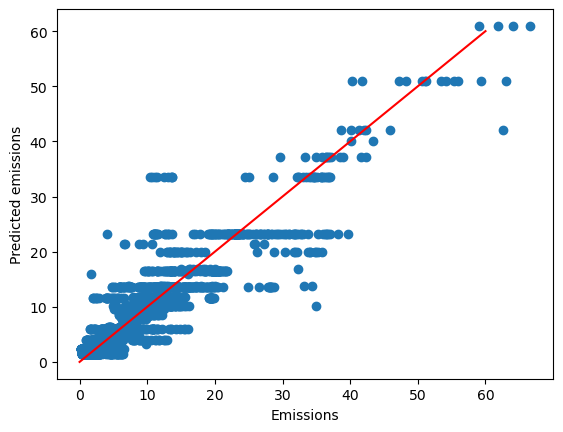

In [18]:
rf = RandomForestRegressor(n_estimators=1, random_state=42, max_depth=5)
accuracy_scoreout = rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_train)

mse = mean_squared_error(y_train, y_pred_rf)
r2 = r2_score(y_train, y_pred_rf)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_train, y_pred_rf)
plt.xlabel("Emissions")
plt.ylabel("Predicted emissions")
plt.plot(np.linspace(0,60), np.linspace(0,60), color="r")
plt.show()



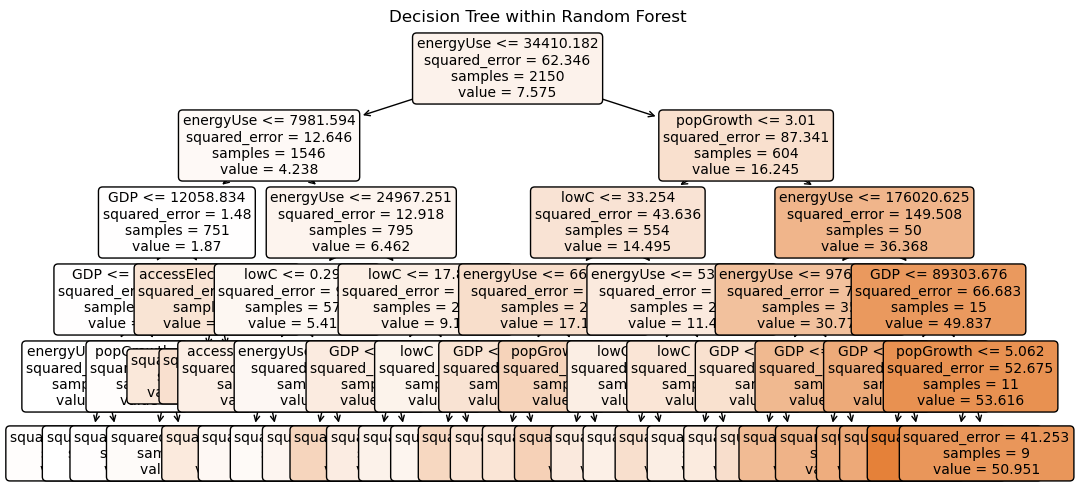

In [19]:
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier, export_graphviz

tree_to_plot = rf.estimators_[0]  # Replace with the index of the tree you want to plot
plt.figure(figsize=(12, 6))
plot_tree(tree_to_plot, filled=True, feature_names = ["lowC", "accessElec", "popGrowth", "energyUse", "GDP"], rounded=True, fontsize=10)
plt.title("Decision Tree within Random Forest")
plt.show()

In [20]:
import pydotplus
d_tree = export_graphviz(tree_to_plot, feature_names = ["lowC", "accessElec", "popGrowth", "energyUse", "GDP"], filled = True)
pydot_graph = pydotplus.graph_from_dot_data(d_tree)
pydot_graph.write_pdf('emissionsgraph.pdf')

True

# Misc

In [21]:
big_ones = X_[X_["y"] >= 0.001]
plt.scatter(big_ones["GDP"], big_ones["y"])
big_ones

NameError: name 'X_' is not defined